# Pi - 5º SEMESTRE

## Grupo
Gabriel Rodrigues Bolonha Santos

Cayk Andrade Magnani

## Descrição do Domínio
A base utilizada é uma base de voos de companhias aéreas no brasil entre os anos de 2015  e 2017

A base contém dados como Previsão de partida e chegada, Partida e chegada real, companhia aérea, Origem e destino dos voos e o status(concluído/cancelado)

## Base de dados
Flights in Brazil
https://www.kaggle.com/datasets/ramirobentes/flights-in-brazil


## Informações da base de dados
Quantidade de atributos: 21
Quantidade de exemplos: 2368114
Há valores ausentes nas colunas Código Justificativa, Chegada.Real, Partida.Real
São 2 classes, Realizado e Cancelado

Realizado - 2100136
Cancelado - 267978

## Pré Processamento

No pré processamento foram removidas as seguintes colunas
Chegada.Real','Partida.Real','Cidade.Origem','Estado.Origem'	,'Pais.Origem','Cidade.Destino',	'Estado.Destino',	'Pais.Destino','Codigo.Justificativa','Codigo.Tipo.Linha', 'Voos', 'LatDest', 'LatOrig', 'LongDest', 'LongOrig'

## Extração de padrão

Para a extração de padrão, foi necessário alterar a etapa de pré processamento
 - As colunas de data, foram removidas e mantidas em colunas separadas as informações de dia e mês
 - Já as colunas em string(categóricas), foram convertidas para valores numéricos pois os algoritmos do sklearn não estavam aceitando strings

 Os algoritmos treinados foram ( LogisticRegression, LinearDiscriminantAnalysis, KNeighborsClassifier, DecisionTreeClassifier e GaussianNB)

 O algoritmo SVC foi removido, o tamanho do dataset impede o algoritmo de terminar sua execução em tempo satisfatório

Para o treinamento dos algoritmos, foi utilizado o método de validação cruzada com KFold, separando os dados em diversos subconjuntos

Foram utilizados *10 subconjuntos* para cada algoritmo e a semente *7*  para randomizar a geração de folds e após isso os algoritmos foram treinados

Os algoritmos obtiveram uma média acima de 80%, todos bem próximos, mas apenas o **KNeighborsClassifier** e o **DecisionTreeClassifier** obtiveram uma matriz de confusão ideal para o dataset, os outros algoritmos não classificaram nenhuma instância de teste como **Cancelado**, isso acontece devido a grande diferença de instâncias de cada classe, caso esperado para esta base

Foram realizados alguns testes com dados gerados pelo usuário para testes, de 5 instâncias, uma delas cancelada, o algoritmo que mais classificou as instâncias como canceladas e corretamente foi o knn baseado nos testes com dados de usuário



In [98]:
import pandas as pd

# from google.colab import drive
# drive.mount('/content/drive')

# Coloque o caminho para salvar os arquivos aqui
base_path = "."

# df = pd.read_csv("./BrFlights2_utf-8.csv", delimiter=",")
df = pd.read_csv(f'{base_path}/BrFlights2_utf-8.csv', delimiter=',')



In [99]:
df.shape[0]

2368114

In [100]:
#Lista as primeiras 5 linhas do csv
df.head(5)

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,...,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig
0,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,2016-01-30T10:35:00Z,Realizado,NaN,Afonso Pena,...,PR,Brasil,Salgado Filho,Porto Alegre,RS,Brasil,-51.175381,-29.993473,-49.172481,-25.532713
1,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
2,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
3,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-19T12:13:00Z,2016-01-18T12:03:00Z,2016-01-19T21:30:00Z,2016-01-18T20:41:00Z,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
4,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473


In [101]:
#Mostra contagem dos dados
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368114 entries, 0 to 2368113
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Voos                  2368114 non-null  object 
 1   Companhia.Aerea       2368114 non-null  object 
 2   Codigo.Tipo.Linha     2368114 non-null  object 
 3   Partida.Prevista      2368114 non-null  object 
 4   Partida.Real          2100136 non-null  object 
 5   Chegada.Prevista      2368114 non-null  object 
 6   Chegada.Real          2100136 non-null  object 
 7   Situacao.Voo          2368114 non-null  object 
 8   Codigo.Justificativa  960169 non-null   object 
 9   Aeroporto.Origem      2368114 non-null  object 
 10  Cidade.Origem         2368114 non-null  object 
 11  Estado.Origem         2368114 non-null  object 
 12  Pais.Origem           2368114 non-null  object 
 13  Aeroporto.Destino     2368114 non-null  object 
 14  Cidade.Destino        2368114 non-

In [102]:
# Remove colunas desnecessárias para os dados
df = df.drop(columns=['Chegada.Real','Partida.Real','Cidade.Origem','Estado.Origem'	,'Pais.Origem','Cidade.Destino',	'Estado.Destino',	'Pais.Destino','Codigo.Justificativa','Codigo.Tipo.Linha', 'Voos', 'LatDest', 'LatOrig', 'LongDest', 'LongOrig'])
df['Chegada.Prevista'] = pd.to_datetime(df['Chegada.Prevista'])
df['Partida.Prevista'] = pd.to_datetime(df['Partida.Prevista'])

df['Dia.Chegada.Prevista'] = df['Chegada.Prevista'].dt.day
df['Mes.Chegada.Prevista'] = df['Chegada.Prevista'].dt.month
df['Dia.Partida.Prevista'] = df['Partida.Prevista'].dt.day
df['Mes.Partida.Prevista'] = df['Partida.Prevista'].dt.month

df = df.drop(columns=['Chegada.Prevista','Partida.Prevista'])

In [103]:
#Lista as primeiras 10 linhas do csv
df.head(10)


,Companhia.Aerea,Situacao.Voo,Aeroporto.Origem,Aeroporto.Destino,Dia.Chegada.Prevista,Mes.Chegada.Prevista,Dia.Partida.Prevista,Mes.Partida.Prevista
0,AMERICAN AIRLINES INC,Realizado,Afonso Pena,Salgado Filho,30,1,30,1
1,AMERICAN AIRLINES INC,Realizado,Salgado Filho,Miami,13,1,13,1
2,AMERICAN AIRLINES INC,Realizado,Salgado Filho,Miami,29,1,29,1
3,AMERICAN AIRLINES INC,Realizado,Salgado Filho,Miami,19,1,19,1
4,AMERICAN AIRLINES INC,Realizado,Salgado Filho,Miami,30,1,30,1
5,AMERICAN AIRLINES INC,Realizado,Miami,Afonso Pena,4,1,3,1
6,AMERICAN AIRLINES INC,Realizado,Miami,Afonso Pena,6,1,5,1
7,AMERICAN AIRLINES INC,Realizado,Salgado Filho,Miami,18,1,18,1
8,AMERICAN AIRLINES INC,Realizado,Miami,Afonso Pena,23,1,22,1
9,AMERICAN AIRLINES INC,Realizado,Miami,Afonso Pena,16,1,15,1


In [104]:
#Mostra novamente a contagem das colunas
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368114 entries, 0 to 2368113
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Companhia.Aerea       2368114 non-null  object
 1   Situacao.Voo          2368114 non-null  object
 2   Aeroporto.Origem      2368114 non-null  object
 3   Aeroporto.Destino     2368114 non-null  object
 4   Dia.Chegada.Prevista  2368114 non-null  int32 
 5   Mes.Chegada.Prevista  2368114 non-null  int32 
 6   Dia.Partida.Prevista  2368114 non-null  int32 
 7   Mes.Partida.Prevista  2368114 non-null  int32 
dtypes: int32(4), object(4)
memory usage: 108.4+ MB


In [105]:
#Verifica se há alguma linha duplicada
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2368109     True
2368110     True
2368111     True
2368112     True
2368113     True
Length: 2368114, dtype: bool

Situacao.Voo
Realizado    2100136
Cancelado     267978
Name: count, dtype: int64

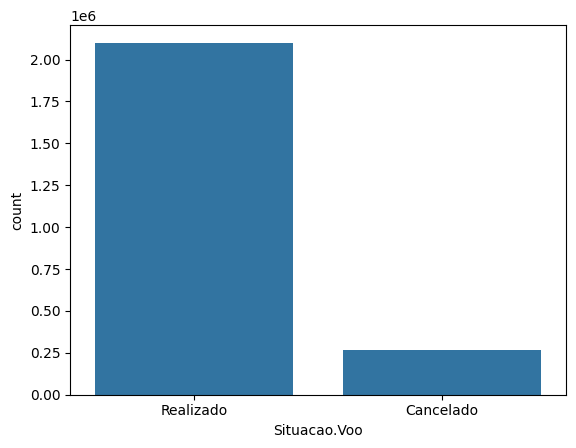

In [106]:
#Mostra a distribuição das classes
#Nesse caso é normal que haja mais voos concluídos do que cancelados
import seaborn as sns
import matplotlib.pyplot as plt

display(df['Situacao.Voo'].value_counts())
sns.countplot(x='Situacao.Voo', data=df)

plt.show()

In [107]:
# salva os dados limpos
df.to_csv(f"{base_path}/cleaned.csv", index=False)

In [108]:


categorical_cols = ['Companhia.Aerea', 'Aeroporto.Origem', 'Aeroporto.Destino']

category_mappings = {}
# Transforma as colunas categóricas em valores numéricos
for col in categorical_cols:
    df[col] = df[col].astype('category')

    category_mappings[col] = df[col].cat.categories

for col in categorical_cols:
    df[col] = df[col].cat.codes

# Salva as colunas para as previsões
import pickle
with open(f'{base_path}/category_mappings.pkl', 'wb') as f:
    pickle.dump(category_mappings, f)

# Remove a classe para correlação
df_values = df.drop(columns=["Situacao.Voo"])
df_correlation = df_values.corr()


df_correlation

,Companhia.Aerea,Aeroporto.Origem,Aeroporto.Destino,Dia.Chegada.Prevista,Mes.Chegada.Prevista,Dia.Partida.Prevista,Mes.Partida.Prevista
Companhia.Aerea,1.000000,-0.131203,-0.131060,0.000203,-0.009871,0.000083,-0.009965
Aeroporto.Origem,-0.131203,1.000000,0.026116,-0.000258,0.000783,-0.000307,0.000876
Aeroporto.Destino,-0.131060,0.026116,1.000000,-0.000227,0.000164,-0.000358,0.000251
Dia.Chegada.Prevista,0.000203,-0.000258,-0.000227,1.000000,0.013345,0.982953,0.014448
Mes.Chegada.Prevista,-0.009871,0.000783,0.000164,0.013345,1.000000,0.015213,0.999442
Dia.Partida.Prevista,0.000083,-0.000307,-0.000358,0.982953,0.015213,1.000000,0.014125
Mes.Partida.Prevista,-0.009965,0.000876,0.000251,0.014448,0.999442,0.014125,1.000000


In [109]:
# salva os dados pré processados
df.to_csv(f"{base_path}/pre_processed.csv", index=False)

In [110]:
from sklearn.model_selection import train_test_split

y = df["Situacao.Voo"]
x = df.drop("Situacao.Voo", axis=1)


X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [111]:
x


,Companhia.Aerea,Aeroporto.Origem,Aeroporto.Destino,Dia.Chegada.Prevista,Mes.Chegada.Prevista,Dia.Partida.Prevista,Mes.Partida.Prevista
0,8,6,155,30,1,30,1
1,8,155,112,13,1,13,1
2,8,155,112,29,1,29,1
3,8,155,112,19,1,19,1
4,8,155,112,30,1,30,1
...,...,...,...,...,...,...,...
2368109,12,3,178,15,11,15,11
2368110,12,3,178,21,11,21,11
2368111,12,3,178,13,11,13,11
2368112,12,3,178,6,11,6,11


In [112]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score

seed = 7
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

results = []
names = []
for name, model in models:
   kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
   cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)

   msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
   print(msg)


/home/gabriel/Projetos/Pessoal/pi-5/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/gabriel/Projetos/Pessoal/pi-5/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/gabriel/Projetos/Pessoal/pi-5/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/gabriel/Projetos/Pe

LR: 0.886813 (0.001058)
LDA: 0.886803 (0.001065)
KNN: 0.877322 (0.000964)
CART: 0.845872 (0.000996)
NB: 0.886813 (0.001058)


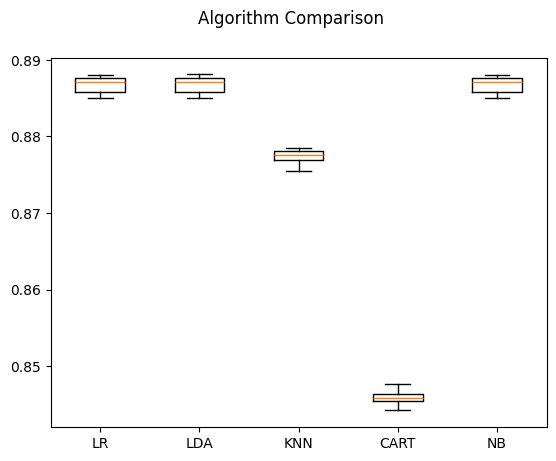

In [113]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [114]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
with open(f'{base_path}/knn.pkl', 'wb') as file:
  pickle.dump(knn, file)
predictions = knn.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8775806372152273
[[  9947  70404]
 [ 16567 613517]]
              precision    recall  f1-score   support

   Cancelado       0.38      0.12      0.19     80351
   Realizado       0.90      0.97      0.93    630084

    accuracy                           0.88    710435
   macro avg       0.64      0.55      0.56    710435
weighted avg       0.84      0.88      0.85    710435



In [115]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train, Y_train)
with open(f'{base_path}/lr.pkl', 'wb') as file:
  pickle.dump(lr, file)
predictions = lr.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

/home/gabriel/Projetos/Pessoal/pi-5/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.8868988718179707
[[     0  80351]
 [     0 630084]]


/home/gabriel/Projetos/Pessoal/pi-5/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gabriel/Projetos/Pessoal/pi-5/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

   Cancelado       0.00      0.00      0.00     80351
   Realizado       0.89      1.00      0.94    630084

    accuracy                           0.89    710435
   macro avg       0.44      0.50      0.47    710435
weighted avg       0.79      0.89      0.83    710435



/home/gabriel/Projetos/Pessoal/pi-5/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [116]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
with open(f'{base_path}/lda.pkl', 'wb') as file:
  pickle.dump(lda, file)
predictions = lda.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8868876111115022
[[     4  80347]
 [    12 630072]]
              precision    recall  f1-score   support

   Cancelado       0.25      0.00      0.00     80351
   Realizado       0.89      1.00      0.94    630084

    accuracy                           0.89    710435
   macro avg       0.57      0.50      0.47    710435
weighted avg       0.81      0.89      0.83    710435



In [117]:
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
with open(f'{base_path}/cart.pkl', 'wb') as file:
  pickle.dump(cart, file)
predictions = cart.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8484182226382427
[[ 15023  65328]
 [ 42361 587723]]
              precision    recall  f1-score   support

   Cancelado       0.26      0.19      0.22     80351
   Realizado       0.90      0.93      0.92    630084

    accuracy                           0.85    710435
   macro avg       0.58      0.56      0.57    710435
weighted avg       0.83      0.85      0.84    710435



In [118]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
with open(f'{base_path}/nb.pkl', 'wb') as file:
  pickle.dump(nb, file)
predictions = nb.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8868988718179707
[[     0  80351]
 [     0 630084]]


/home/gabriel/Projetos/Pessoal/pi-5/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gabriel/Projetos/Pessoal/pi-5/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

   Cancelado       0.00      0.00      0.00     80351
   Realizado       0.89      1.00      0.94    630084

    accuracy                           0.89    710435
   macro avg       0.44      0.50      0.47    710435
weighted avg       0.79      0.89      0.83    710435



/home/gabriel/Projetos/Pessoal/pi-5/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [129]:
nova_tabela = pd.read_csv(f"{base_path}/base_teste.csv", sep=',')

with open(f'{base_path}/category_mappings.pkl', 'rb') as f:
    category_mappings = pickle.load(f)

for col in category_mappings:
    nova_tabela[col] = pd.Categorical(nova_tabela[col], categories=category_mappings[col])
    nova_tabela[col] = nova_tabela[col].cat.codes

display(nova_tabela)


,Companhia.Aerea,Aeroporto.Origem,Aeroporto.Destino,Dia.Chegada.Prevista,Mes.Chegada.Prevista,Dia.Partida.Prevista,Mes.Partida.Prevista
0,8,6,112,22,3,21,3
1,8,6,112,25,4,25,4
2,8,112,6,1,12,3,12
3,12,178,156,12,8,13,8
4,24,168,135,17,8,17,8


In [131]:
previsao = knn.predict(nova_tabela)
print(previsao)

['Realizado' 'Realizado' 'Realizado' 'Realizado' 'Cancelado']


In [128]:
previsao = lr.predict(nova_tabela)
print(previsao)

['Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado']


In [122]:
previsao = lda.predict(nova_tabela)
print(previsao)

['Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado']


In [123]:
previsao = cart.predict(nova_tabela)
print(previsao)

['Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado']


In [124]:
previsao = nb.predict(nova_tabela)
print(previsao)

['Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado']
